# Support Vector Machines - Ch. 9 Lab

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report

%matplotlib inline

##### Define a function to plot a classifier with support vectors.

In [2]:
def plot_svc(svc, X, y, h=0.002, pad=0.25):
    x_min = X[:, 0].min() - pad
    x_max = X[:, 0].max() + pad
    y_min = X[:, 1].min() - pad
    y_max = X[:, 1].max() + pad
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # np.c_ adds a second axis and concatenates the arrays along that axis.
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    
    plt.scatter(X[:, 0], X[:, 1], s=70, c=y, cmap=plt.cm.Paired)
    
    # Support vecotrs are indicated by the the plot's vertical lines.
    sv = svc.support_vectors_
    
    plt.scatter(sv[:, 0], sv[:, 1], c='k', marker='x', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    #plt.tight_layout();
    print('Number of support vectors: ', svc.support_.size)

### 9.6.1 Support Vector Classifier

The `SVC()` function is used when the kernel is linear.

The `c` argument assigns the cost of a violiation to the margin. When `c` small, then margins will be **wide** and many support vectors will be on the margine or will violate the margin. When `c` is large, then the margins will be **narrow** and there were will be few support vectors on the margin or violating the margin.

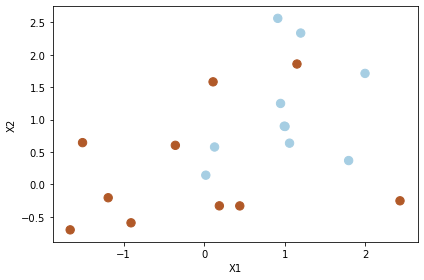

In [3]:
# Generating 20 random obersvations comprised of two features.
# Divide observations into two classes.
np.random.seed(5)
X = np.random.randn(20, 2)
y = np.repeat([1, -1], 10)
X[y == -1] = X[y == -1] + 1


plt.scatter(X[:,0], X[:, 1], s=70, c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')
plt.tight_layout();

Number of support vectors:  13


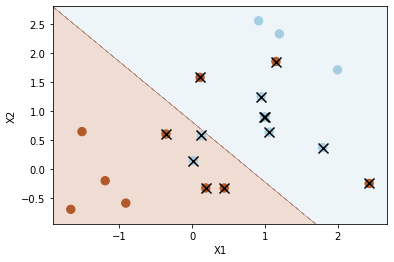

In [4]:
# SVC w/ linear kernel
svc = SVC(C=1.0, kernel='linear')
svc.fit(X, y)

plot_svc(svc, X, y)

The observations with crossess are the **support vectors**. The following array shows the support vectors.

In [5]:
svc.support_

array([10, 11, 13, 14, 15, 16, 17,  0,  1,  2,  4,  6,  8])

Number of support vectors:  16


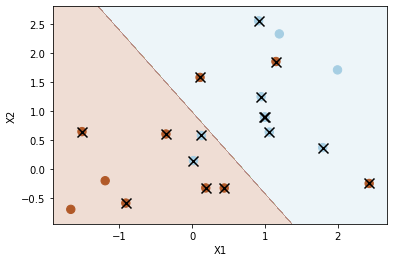

In [6]:
# When using a smaller cost parameter (C=0.1) the margin is wider, resulting in more support vectors.
# More red data points on the "blue" side.
svc2 = SVC(C=0.1, kernel='linear')
svc2.fit(X, y)
plot_svc(svc2, X, y)

Since a smaller `c` is being used, there are more support vectors.

In [7]:
# svc2 support vectors
svc2.support_

array([10, 11, 13, 14, 15, 16, 17, 19,  0,  1,  2,  3,  4,  6,  8,  9])

Use GridSearchCV to identify the optimal value for C.

In [8]:
params = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
svc = SVC(kernel='linear')
clf = GridSearchCV(svc, param_grid=params, cv=10, scoring='accuracy')
clf.fit(X, y)

GridSearchCV(cv=10, estimator=SVC(kernel='linear'),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}],
             scoring='accuracy')

Cross-validation error for each model.

In [9]:
clf.cv_results_

{'mean_fit_time': array([0.00049345, 0.00050271, 0.00041006, 0.00020151, 0.00029714,
        0.00050011, 0.00099978]),
 'std_fit_time': array([4.93508468e-04, 5.02729896e-04, 5.02395056e-04, 4.03028986e-04,
        4.54097299e-04, 5.00148426e-04, 1.00883463e-05]),
 'mean_score_time': array([0.00050309, 0.0002996 , 0.00029683, 0.00060213, 0.00030303,
        0.00019639, 0.        ]),
 'std_score_time': array([0.00050319, 0.00045765, 0.00045343, 0.00049206, 0.0004631 ,
        0.00039306, 0.        ]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 5, 10, 100],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 5},
  {'C': 10},
  {'C': 100}],
 'split0_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split1_test_score': array([0.5, 0.5, 0.5, 0. , 0. , 0. , 0. ]),
 'split2_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 '

Optimal `C` value

In [10]:
clf.best_params_

{'C': 0.001}

Generate test data

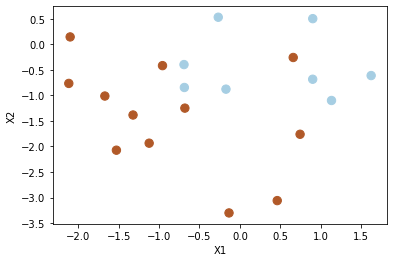

In [11]:
np.random.seed(1)
X_test = np.random.randn(20, 2)
y_test = np.random.choice([-1, 1], 20)
X_test[y_test == 1] = X_test[y_test == 1] - 1

plt.scatter(X_test[:, 0], X_test[:, 1], s=70, c=y_test, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');

In [12]:
# svc2 : C = 0.1
y_pred = svc2.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc2.classes_, columns=svc2.classes_)

,-1,1
-1,2,6
1,0,12


In [13]:
svc3 = SVC(C=0.001, kernel='linear')
svc3.fit(X, y)

y_pred = svc3.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc3.classes_, columns=svc3.classes_)

,-1,1
-1,2,6
1,0,12


**RESULT:** Although the different value assumed for a tuning parameter, the two models perform the same.

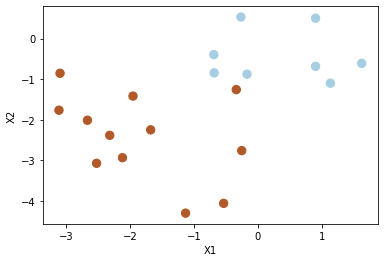

In [14]:
# Changing the test data so that the classes are really seperable with a hyperplane.
X_test[y_test == 1] = X_test[y_test == 1] -1
plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');

Number of support vectors:  4


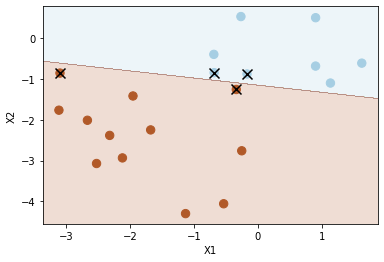

In [16]:
svc4 = SVC(C=10, kernel='linear')
svc4.fit(X_test, y_test)
plot_svc(svc4, X_test, y_test)

Number of support vectors:  5


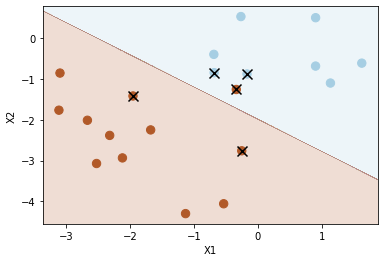

In [17]:
svc5 = SVC(C=1, kernel='linear')
svc5.fit(X_test, y_test)
plot_svc(svc5, X_test, y_test)

## 9.6.2. Support Vector Machine

To fit a SVM, I continue to use `SupportVectorClassifier` class but I revise the `kernel` hyperparameter. To fit a **polynomial SVM**, I set `kernel = "polynomial"` and specify the polynomial `degree` to the desired valued. To fit a **radial SVM**, I set `kernel = "radial"` and adjust `gamma` accordingly. As `gamma` increases, the fit becomes **more non-linear**.

Text(0, 0.5, 'X2')

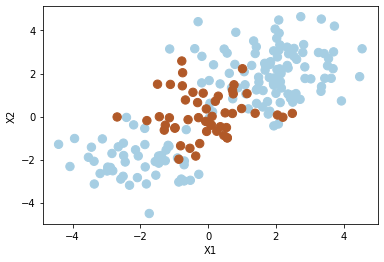

In [21]:
np.random.seed(8)
X = np.random.randn(200, 2)
X[:100] = X[:100] + 2
X[101:150] = X[101:150] - 2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1, 50)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

Being that red observations are clustered in the center, the plot suggests a radial kernel.

Number of support vectors:  51


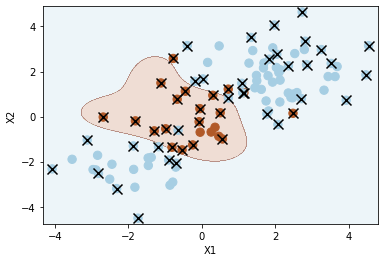

In [22]:
svm = SVC(C=1.0, kernel='rbf', gamma=1)
svm.fit(X_train, y_train)
plot_svc(svm, X_train, y_train)

The SVM did a reasonable job of fitting the data. To decrease the number of training errors, I can increase the value of cost, i.e., `C` hyperparameter.

Number of support vectors:  36


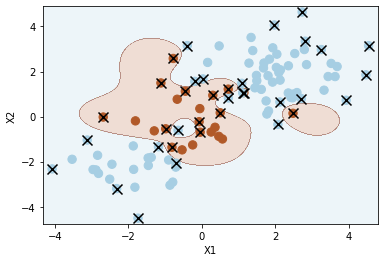

In [23]:
svm2 = SVC(C=100, kernel='rbf', gamma=1)
svm2.fit(X_train, y_train)
plot_svc(svm2, X_train, y_train)

By increasing the value of cost, the model performs better on the training data. However, the irregular shape presents a risk of overfitting.

In [25]:
params = {'C': [0.01, 0.1, 1, 10, 100],
         'gamma': [0.5, 1, 2, 3, 4]}
clf = GridSearchCV(SVC(kernel='rbf'), params, cv=10, scoring='accuracy')
clf.fit(X_train, y_train)
clf.best_params_

{'C': 10, 'gamma': 0.5}

In [26]:
y_pred = clf.best_estimator_.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[66,  7],
       [ 6, 21]], dtype=int64)

In [28]:
clf.best_estimator_.score(X_test, y_test)

0.87

Number of support vectors:  32


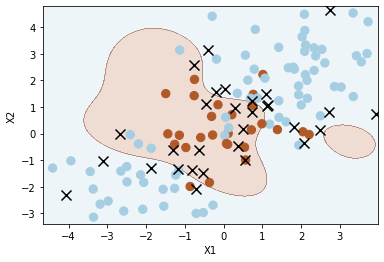

In [29]:
plot_svc(clf.best_estimator_, X_test, y_test)

## 9.6.3. ROC Curves

Comparing ROC curves of two models on train/test data. One model is more flexible than the other.

In [30]:
# More constrained, rigid
svm3 = SVC(C=1, kernel='rbf', gamma=1)
svm3.fit(X_train, y_train)

SVC(C=1, gamma=1)

In [31]:
# More flexible
svm4 = SVC(C=1, kernel='rbf', gamma=50)
svm4.fit(X_train, y_train)

SVC(C=1, gamma=50)

SVMs and support vector classifiers output class labels for each observation. However, it is also possible to obtain fitted values for each observation, which are the numerical scores used to obtain the class labels.  For instance, in the case of a support vector classifier, the fitted value for an observation $X = (X_1,X_2, . . .,X_p)^T$ takes the form $\hat\beta_0 + \hat\beta_1X_1 + \hat\beta_2X_2 + . . . + \hat\beta_pX_p$.

In essence, the sign of the fitted value determines on which side of the decision boundary the observation lies. Therefore, the relationship between the fitted value and the class prediction for a given observation is simple: if the fitted value exceeds zero then the observation is assigned to one class, and if it is less than zero than it is assigned to the other.

To obtain the fitted values for a given SVM model fit, we use the `decision_function()` method of the SVC:

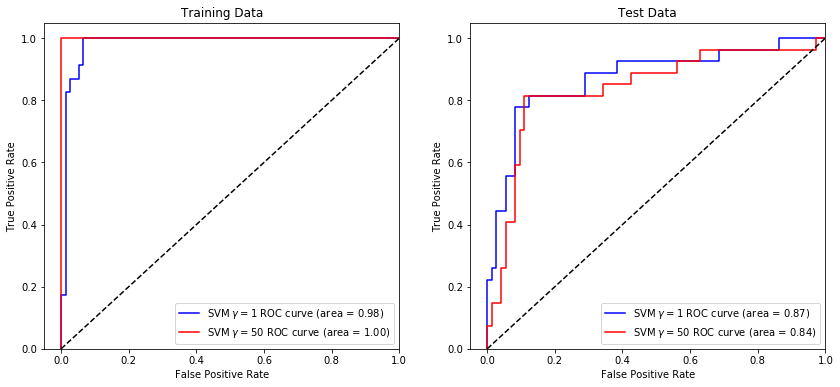

In [38]:
y_train_score3 = svm3.decision_function(X_train)
y_train_score4 = svm4.decision_function(X_train)

# SVM 3
false_pos_rate3, true_pos_rate3, _ = roc_curve(y_train, y_train_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

# SVM 4
false_pos_rate4, true_pos_rate4, _ = roc_curve(y_train, y_train_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.plot(false_pos_rate3, true_pos_rate3, label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc3, color='b')
ax1.plot(false_pos_rate4, true_pos_rate4, label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc4, color='r')
ax1.set_title('Training Data')

y_test_score3 = svm3.decision_function(X_test)
y_test_score4 = svm4.decision_function(X_test)

false_pos_rate3, true_pos_rate3, _ = roc_curve(y_test, y_test_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _ = roc_curve(y_test, y_test_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

ax2.plot(false_pos_rate3, true_pos_rate3, label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc3, color='b')
ax2.plot(false_pos_rate4, true_pos_rate4, label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc4, color='r')
ax2.set_title('Test Data')

for ax in fig.axes:
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([-0.05, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc='lower right')

In [ ]:
The more flexible SVM model seems to have overfitted. The model performs nearly perfect on the training set. How